In [36]:
import pandas as pd
filepath ='Coffee_Chain_Sales .csv'

#Load Data Set into Pandas Data Frame
data = pd.read_csv(filepath)

DATA PRE-PROCESSING

In [37]:
#1  Identify null values in the dataset
null_counts = data.isnull().sum()
null_percentage = (data.isnull().sum() / len(data)) * 100
print("\nNull Counts:")
print(null_counts)
print("\nNull Percentage:")
print(null_percentage)

#2 Identify duplicate columns and rows
duplicate_rows = data.duplicated().sum()
duplicate_columns = data.columns.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)
print("Duplicate Columns:", duplicate_columns) 


#There seem to be no null or duplicate values hence proceeding to next Data cleaning step


Null Counts:
Area Code                                 0
Cogs                                      0
DifferenceBetweenActualandTargetProfit    0
Date                                      0
Inventory Margin                          0
Margin                                    0
Market_size                               0
Market                                    0
Marketing                                 0
Product_line                              0
Product_type                              0
Product                                   0
Profit                                    0
Sales                                     0
State                                     0
Target_cogs                               0
Target_margin                             0
Target_profit                             0
Target_sales                              0
Total_expenses                            0
Type                                      0
dtype: int64

Null Percentage:
Area Code                      

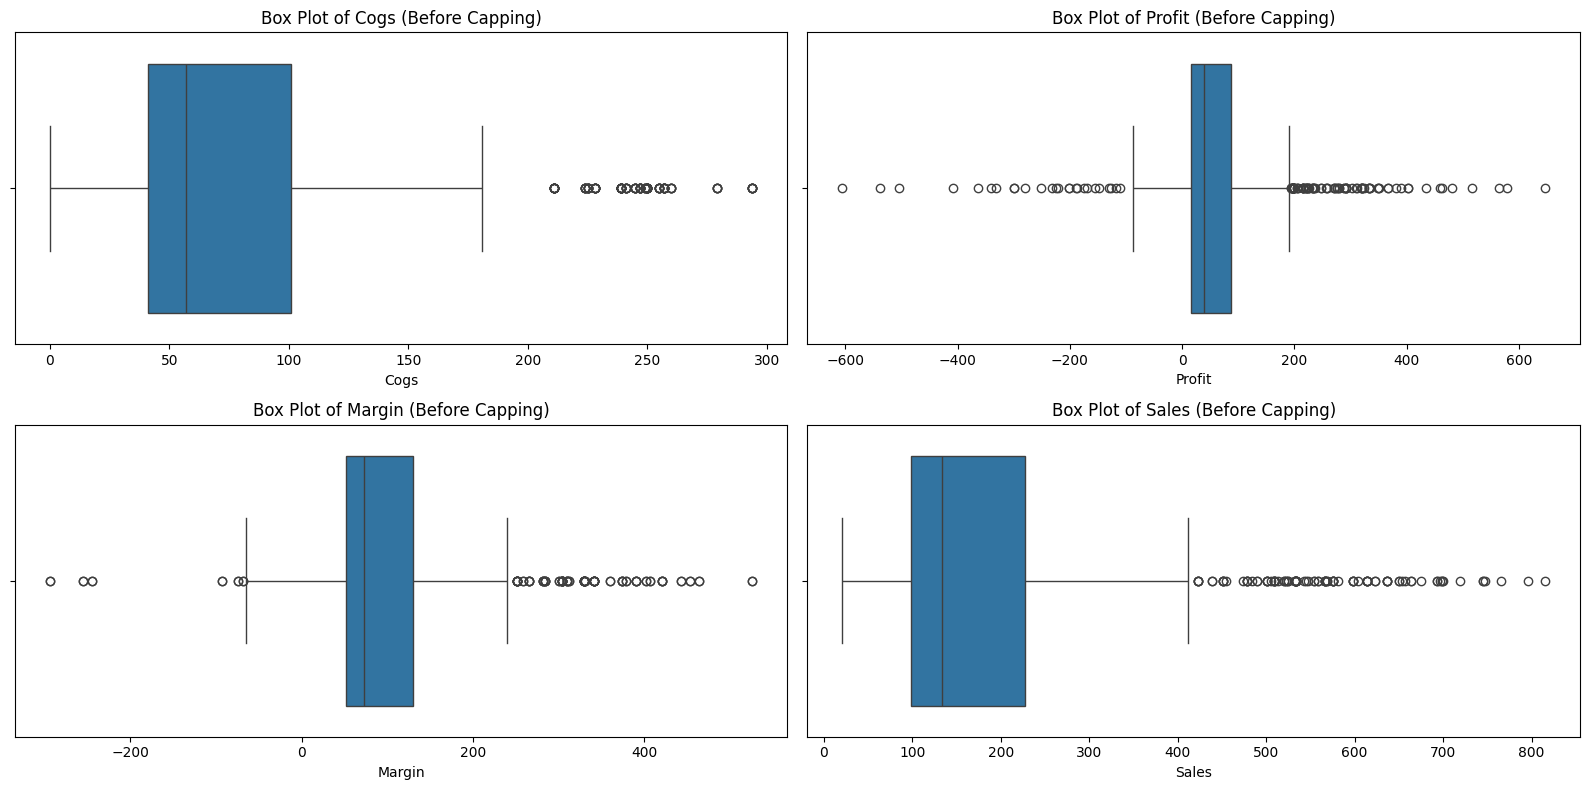

Summary Statistics Before Capping:
               Cogs       Profit       Margin        Sales
count  1062.000000  1062.000000  1062.000000  1062.000000
mean     82.399247    60.556497   102.423729   191.049906
std      64.824295   100.516593    91.286704   148.270317
min       0.000000  -605.000000  -294.000000    21.000000
25%      41.000000    16.250000    51.000000    98.000000
50%      57.000000    39.500000    73.000000   133.000000
75%     101.000000    87.000000   130.000000   227.000000
max     294.000000   646.000000   526.000000   815.000000


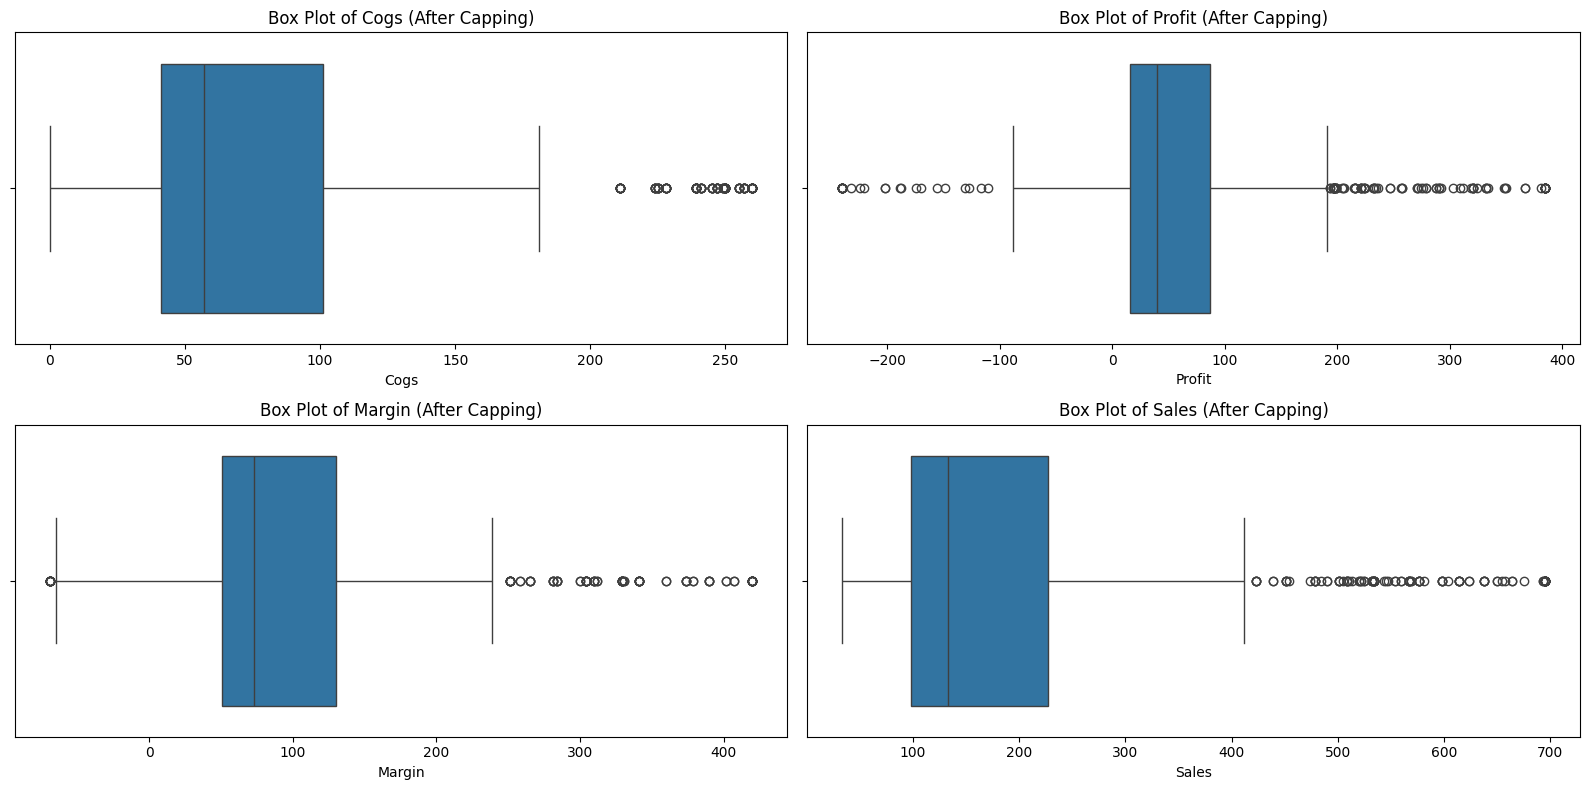

Summary Statistics After Capping:
               Cogs       Profit       Margin        Sales
count  1062.000000  1062.000000  1062.000000  1062.000000
mean     82.135593    61.006412   103.197740   190.671252
std      64.035014    89.527916    86.250848   146.491926
min       0.000000  -239.800000   -69.000000    33.610000
25%      41.000000    16.250000    51.000000    98.000000
50%      57.000000    39.500000    73.000000   133.000000
75%     101.000000    87.000000   130.000000   227.000000
max     260.000000   384.510000   420.000000   694.560000


In [41]:

#3 Handling outliers

import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate Box Plots and statistics Before Capping
plt.figure(figsize=(16, 8))
for i, column in enumerate(['Cogs', 'Profit', 'Margin', 'Sales'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column} (Before Capping)')
plt.tight_layout()
plt.show()

summary_before = data[['Cogs', 'Profit', 'Margin', 'Sales']].describe()
print("Summary Statistics Before Capping:\n", summary_before)

# Step 2: Cap the Outliers
# Define columns to cap
columns_to_cap = ['Cogs', 'Profit', 'Margin', 'Sales']

# Calculate the 1st and 99th percentiles and cap the outliers
for column in columns_to_cap:
    lower_bound = data[column].quantile(0.01)
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


# Step 3: Generate Box Plots and check statistics again After Capping
plt.figure(figsize=(16, 8))
for i, column in enumerate(['Cogs', 'Profit', 'Margin', 'Sales'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column} (After Capping)')

plt.tight_layout()
plt.show()

summary_after = data[['Cogs', 'Profit', 'Margin', 'Sales']].describe()
print("Summary Statistics After Capping:\n", summary_after)

DATA TRANSFORMATION

In [ ]:
#4  Data Transformation (Inconsistent Data Entry)
#Standardizing text data by converting to lower case
text_columns = ['Market', 'Product_line', 'State', 'Type', 'Product_type', 'Product', 'Market_size']
for col in text_columns:
    data[col] = data[col].str.lower()
print(data[text_columns])


#5 Data Transformation (Inconsistent data format)
# Convert 'Date' column to datetime
print("Before Conversion of Date column:", data['Date'].dtype) 

data['Date'] = pd.to_datetime(data['Date'])

print("After Conversion of Date column:", data['Date'].dtype) 


#6 Data Transformation (Having consistent column names)
# Rename columns 'Old Name' to 'New_name'
#Renaming below column names to look consistent with other existing column names
data.rename(columns={'Area Code': 'Area_code'}, inplace=True)
data.rename(columns={'Inventory Margin': 'Inventory_margin'}, inplace=True)


DATA VISUALIZATION

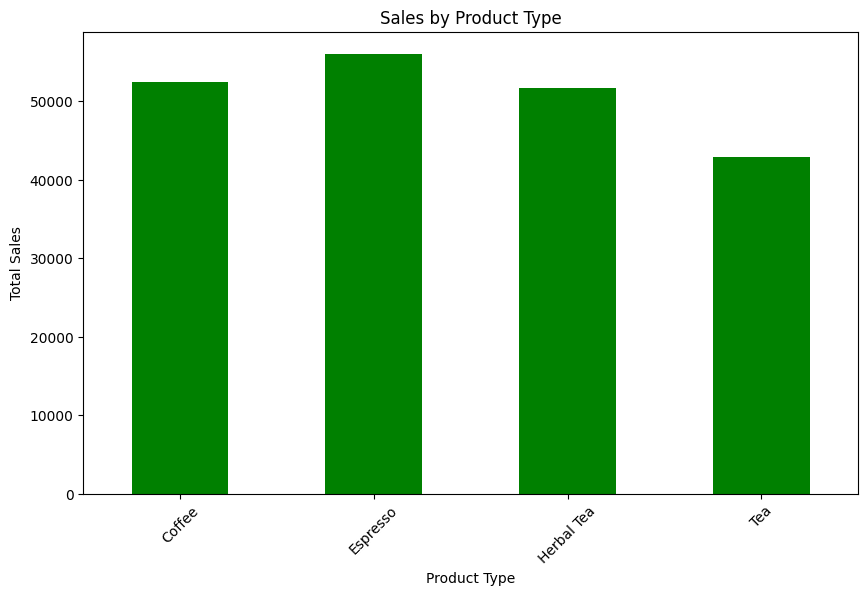

In [38]:
#Business Question 1 : Comparison of Sales by Product Type

# Bar Chart: Sales by Product Type

#This bar chart visualizes total sales for each product type, helping to identify which types are performing best

plt.figure(figsize=(10, 6))
data.groupby('Product_type')['Sales'].sum().plot(kind='bar', color='green')
plt.title('Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

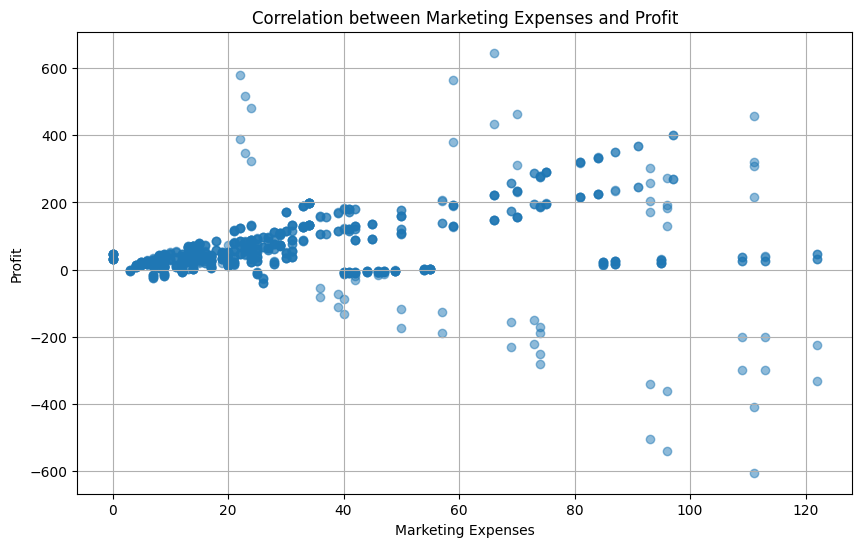

Correlation Coefficient between Marketing Expenses and Profit: 0.22133496817680942


In [39]:
#Business Question 2: Correlation between Marketing Expenses and Profit

# Scatter Plot: Marketing Expenses vs. Profit

#The scatter plot is used to visualize any potential correlation between marketing expenses and profit, indicating how effectively marketing budgets are used

plt.figure(figsize=(10, 6))
plt.scatter(data['Marketing'], data['Profit'], alpha=0.5)
plt.title('Correlation between Marketing Expenses and Profit')
plt.xlabel('Marketing Expenses')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

correlation_coefficient = data['Marketing'].corr(data['Profit'])
print("Correlation Coefficient between Marketing Expenses and Profit:", correlation_coefficient)

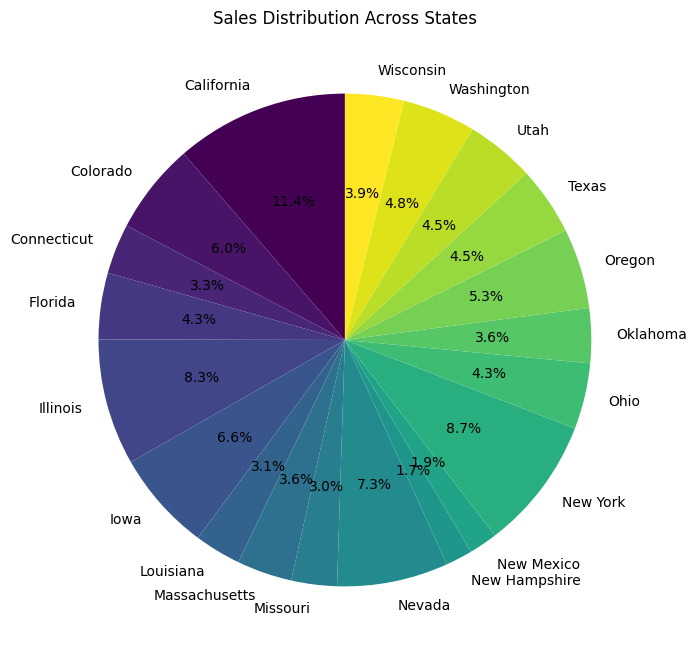

In [40]:
#Business Question 3: Sales Distribution Across Different States

# Pie Chart: Sales Distribution by State

#This pie chart shows the percentage contribution of sales from different states, highlighting areas of market strength and potential growth opportunities

state_sales = data.groupby('State')['Sales'].sum()
plt.figure(figsize=(10, 8))
state_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Sales Distribution Across States')
plt.ylabel('')  
plt.show()